## Group 12 Business Stats - Housing 
This document is being written for anwsering the main question: "What factors has to be taken into consideration when defining house prices in California."
Based on given data in Housing.csv file

In [146]:
#download libaries of statics - Sasha

#Import dataframe
import pandas as pd
import researchpy as rp
import statsmodels.api as sm
from scipy.stats import pearsonr
import scipy.stats as stats
#import matplot for plotting grahs
import matplotlib.pyplot as plt
import numpy as np
#libaries for visulize dataset
import plotly.express as px
import plotly.graph_objects as go
from sklearn import linear_model
#libary for input 
import ipywidgets as widgets
#Import Pymer4 for multiple regression
from pymer4 import Lmer
import statsmodels.formula.api as smf


## 1. The general data in an overview.

In [147]:
#import csv into housing ~ Sasha
housing = pd.read_csv("C:\\Users\\Gerard Kohler\\Downloads\\Housing.csv")
#drop empty values
New_Housing = housing.dropna()
#make dataframe of csv file
df = pd.DataFrame(data=New_Housing)
df["ocean_proximity"] = df["ocean_proximity"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20433 non-null  float64 
 1   latitude            20433 non-null  float64 
 2   housing_median_age  20433 non-null  float64 
 3   total_rooms         20433 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20433 non-null  float64 
 6   households          20433 non-null  float64 
 7   median_income       20433 non-null  float64 
 8   median_house_value  20433 non-null  float64 
 9   ocean_proximity     20433 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.6 MB


In [148]:
#Show dataset of the variables. - Sasha
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

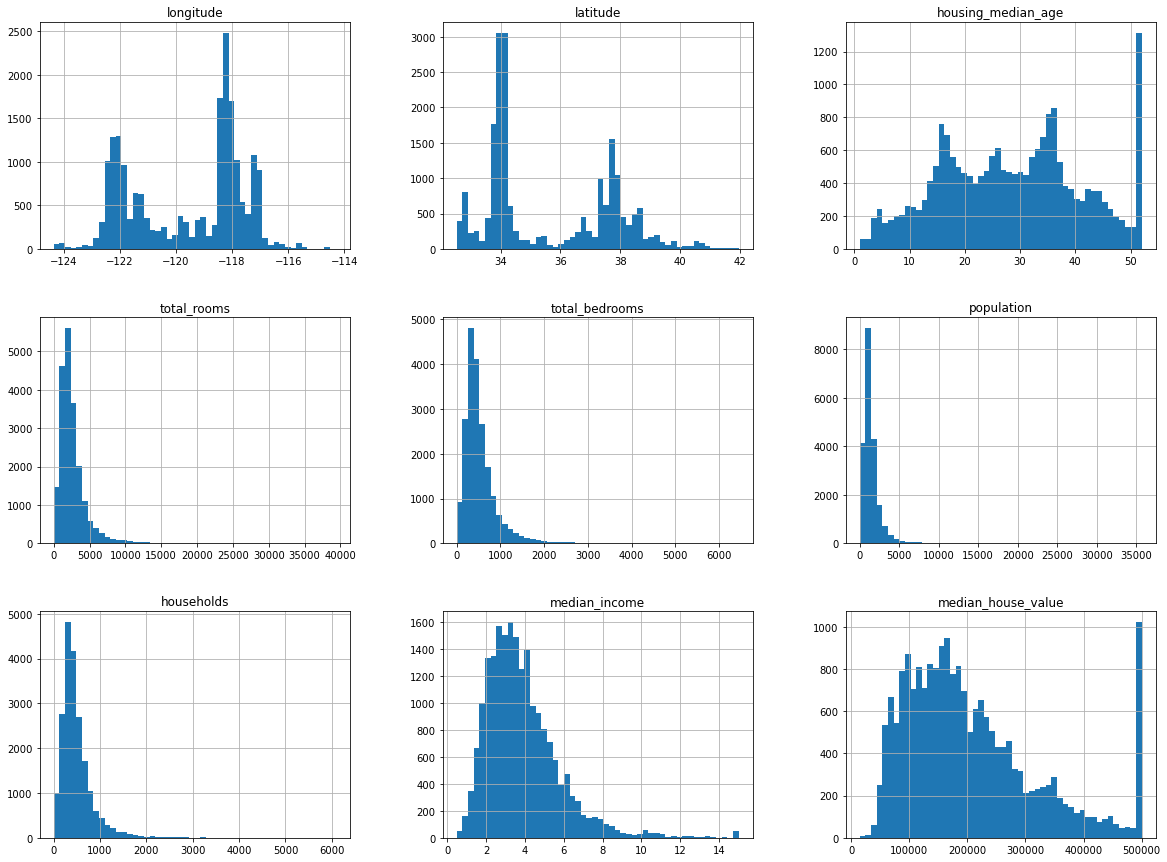

In [149]:
#overall data of per column. As we see some data is capped - Sasha
df.hist(bins=50, figsize=(20,15))

In [150]:
# get a better understanding of the data - Sasha
rp.codebook(df)

Variable: longitude    Data Type: float64 

 Number of Obs.: 20433 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 844 

 Range: [-124.35, -114.31] 
 Mean: -119.57 
 Standard Deviation: 2.0 
 Mode: -118.31 
 10th Percentile: -122.29 
 25th Percentile: -121.8 
 50th Percentile: -118.49 
 75th Percentile: -118.01 
 90th Percentile: -117.25 





Variable: latitude    Data Type: float64 

 Number of Obs.: 20433 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 861 

 Range: [32.54, 41.95] 
 Mean: 35.63 
 Standard Deviation: 2.14 
 Mode: 34.06 
 10th Percentile: 33.63 
 25th Percentile: 33.93 
 50th Percentile: 34.26 
 75th Percentile: 37.72 
 90th Percentile: 38.49 





Variable: housing_median_age    Data Type: float64 

 Number of Obs.: 20433 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 52 

 Range: [1.0, 52.0] 
 Mean: 28.63 
 Standard Deviation: 12.59 
 Mode: 52.0 
 10th Percentile: 12.200000000

In [151]:
# Correlation model
corr = df.corr()
corr.style.background_gradient(cmap='YlGn')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


## 2. Subquestion, "How does the location of a house affect the price of the house?" By Sasha

2.1 Show the relation between (area) location and house values. By Sasha

In [152]:
#Summary of house values between median house values - Sasha
rp.summary_cont(df.groupby(["ocean_proximity"])["median_house_value"])

,N,Mean,SD,SE,95% Conf.,Interval
ocean_proximity,,,,,,
<1H OCEAN,9034,240267.9908,106198.3250,1117.3201,238077.7901,242458.1915
INLAND,6496,124896.8631,70057.9550,869.2295,123192.8871,126600.8392
ISLAND,5,380440.0000,80559.5618,36027.3313,280412.0924,480467.9076
NEAR BAY,2270,259279.2921,122853.7421,2578.5494,254222.7307,264335.8534
NEAR OCEAN,2628,249042.3550,122548.0109,2390.5266,244354.8492,253729.8608


In [153]:
#Make variables of locations - Sasha
near_bay = df[df['ocean_proximity'] == "NEAR BAY"]
inland = df[df['ocean_proximity'] == "INLAND"]
hour_ocean = df[df['ocean_proximity'] == "<1H OCEAN"]
island = df[df['ocean_proximity'] == "ISLAND"]
near_ocean = df[df['ocean_proximity'] == "NEAR OCEAN"]  


One way ANOVA:
"Is there a difference between the mean house Value for the five different ocean proximity?"

- $H_0$: There is no difference between the mean house value for 5 different ocean proximities. <br />
- $H_A$: There is a difference between the mean house value for 5 different ocean proximities.

In [154]:
#one way ANOVA 
stats.f_oneway(island['median_house_value'], near_ocean['median_house_value'], 
near_bay['median_house_value'], inland['median_house_value'], hour_ocean['median_house_value'])

F_onewayResult(statistic=1594.710397153304, pvalue=0.0)


**Result of One-way ANOVA:** As the $p$-value < 0.05, we reject $H_0$ in favor of $H_A$.

In [169]:
# per region the median house value. - Sasha
Ocean_Value=df.groupby("ocean_proximity")["median_house_value"].mean()
print(Ocean_Value)

ocean_proximity
<1H OCEAN     240267.990812
INLAND        124896.863147
ISLAND        380440.000000
NEAR BAY      259279.292070
NEAR OCEAN    249042.355023
Name: median_house_value, dtype: float64

In [ ]:
#Make linear regression line

Text(0, 0.5, 'median_house_value')

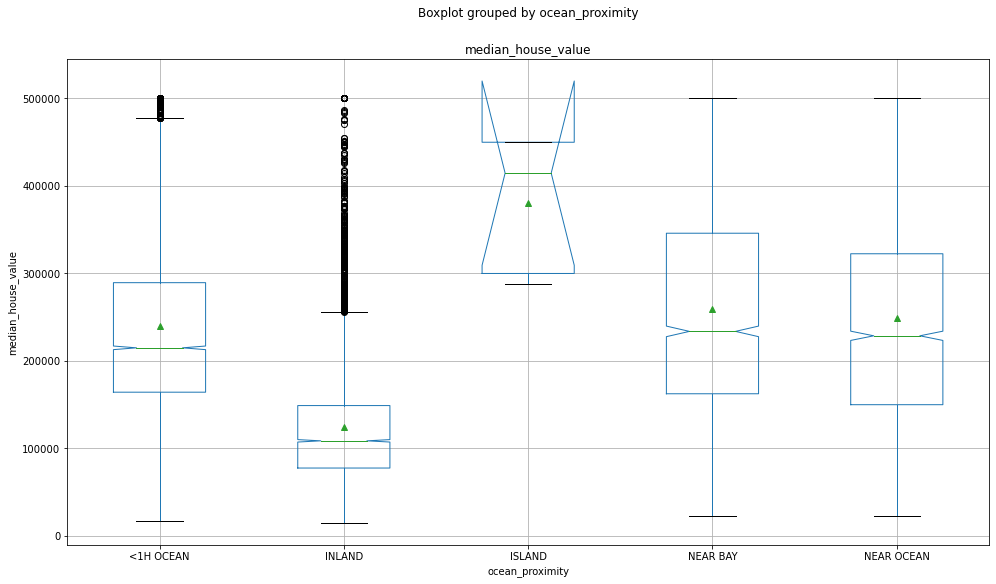

In [156]:
#create a boxplot based on ocean proximity and value of the houses - Sasha
boxplot = df.boxplot(["median_house_value"], by = ["ocean_proximity"],
                     figsize = (16, 9),
                     showmeans = True,
                     notch = True)

boxplot.set_xlabel("ocean_proximity")
boxplot.set_ylabel("median_house_value")

We can see that areas nearby the sea have on higher house prices, (Island has only 5 samples in the data set, this causes bad visuals.) 

Based on visualizing maps, I want to provide insight into where the value of houses is higher using the libarie of plot express.

In [170]:
#plot a the map California with population - sasha
fig = go.Figure(go.Densitymapbox(lat=df.latitude, lon=df.longitude, z=df.median_house_value,
                                 radius=10))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=250)
fig.update_layout(margin={"r":00,"t":0,"l":0,"b":0})
fig.show()

**Conclusion** 

## 3. Subquestion, Show relationships between income and house values ~ Sasha

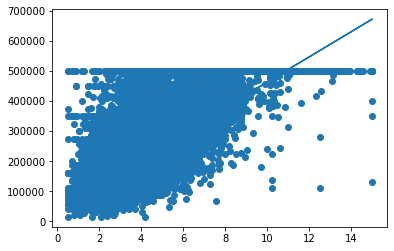

Pearsons correlation: 0.688 . We can conclude that the strength of association is strong


In [178]:
# Show relationship between Income and House value, (Take in considiration that the data is capped @500.000) - Sasha 

#Make variable 
Median_Income = df['median_income']
Median_House_value = df['median_house_value']

#make regression line
slope, intercept, r, p, std_err = stats.linregress(Median_Income, Median_House_value)

def myfunc(Median_Income):
  return slope * Median_Income + intercept

#regression line in varibale
mymodel = list(map(myfunc, Median_Income))

#plot the graph
plt.scatter(Median_Income, Median_House_value)
plt.plot(Median_Income, mymodel)
plt.show()

# calculate Pearson's correlation because we have linear relationship.
corr, _ = pearsonr(Median_Income, Median_House_value)
print('Pearsons correlation: %.3f' % corr, '. We can conclude that the strength of association is strong')

In [159]:
#Create a visual graph of every ocean proximity R square. Found in plotly.express libary, 5 indepented linear   
fig = px.scatter(df, x="median_income", y="median_house_value", color="ocean_proximity", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [160]:
#Multi level Regression
#Intialize model
model = Lmer("median_house_value ~ 1+median_income + (1+median_income|ocean_proximity)", data=df)
print(model.fit())

Formula: median_house_value~1+median_income+(1+median_income|ocean_proximity)

Family: gaussian	 Inference: parametric

Number of observations: 20433	 Groups: {'ocean_proximity': 5.0}

Log-likelihood: -258066.916 	 AIC: 516133.832

Random effects:

                          Name           Var        Std
ocean_proximity    (Intercept)  6.246204e+09  79032.931
ocean_proximity  median_income  3.280723e+07   5727.759
Residual                        5.464532e+09  73922.475

                         IV1            IV2   Corr
ocean_proximity  (Intercept)  median_income  0.843

Fixed effects:

                 Estimate     2.5_ci     97.5_ci         SE     DF  T-stat  \
(Intercept)    101561.969  31381.193  171742.745  35807.176  3.279   2.836   
median_income   39882.808  34648.840   45116.776   2670.441  1.603  14.935   

               P-val Sig  
(Intercept)    0.059   .  
median_income  0.010   *  


In [179]:
#show intercept median income per Ocean_proximity 
model.fixef

,(Intercept),median_income
<1H OCEAN,87587.054137,36083.011622
INLAND,15269.822842,34150.752263
ISLAND,228656.590674,47927.612738
NEAR BAY,97801.112088,38668.117973
NEAR OCEAN,78495.265440,42584.545192


It shows the BETA and the slope of the income.

<AxesSubplot:xlabel='median_income', ylabel='predicted House Value'>

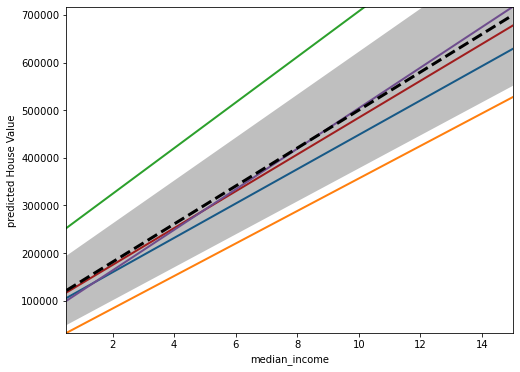

In [162]:
#plot regression line per ocean proximity ~ Sasha
model.plot("median_income", plot_ci=True, ylabel="predicted House Value")


As shown above we can see that there is strong relation between Median income and house values.

## 4. Subquestion, Show the relationship between populated areas and housing values.
This answer gives insight in the relationship between value and populated areas. 

In [163]:
# show relation ship between busy population and medianvalue. 

population = df.population.to_list()       # Moved column from a df to a list
house_value = df.median_house_value.to_list() # Moved column from a df to a list

#find mean of both values 
average_population = np.mean(population)
average_House_Value = np.mean(median_house)

#Calculate B0 and B1
sum1 = 0
sum2 = 0
for i in range(len(population)):
    sum1 = sum1 + ((population[i] - average_population)*(population[i] - average_population))
    sum2 = sum2 + ((house_value[i] - average_House_Value)*(population[i] - average_population))
b1 = sum2/sum1
b0 = average_House_Value - (b1 * average_population)
print (b1)
print (b0)



-2.577188134792151
210536.7695237365


Text(0, 0.5, 'Median Value')

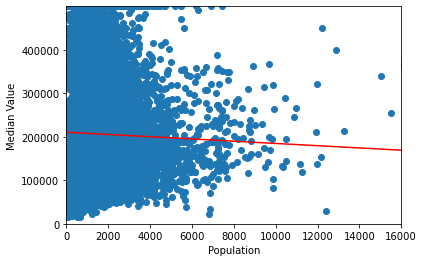

In [173]:
#Make the regression list, and plot the line y = 210536 - 2.57718813 x.
x = np.linspace(1,20000,10000)
y = b0 + (b1*x)
plt.plot(x,y,'r')
plt.scatter(population, house_value)
#Make a x and Y min and max for better reading.
plt.xlim((0,16000))
plt.ylim((0,499999))
#name the X and Y as.
plt.xlabel("Population")
plt.ylabel("Median Value")

In [174]:
#
from sklearn.linear_model import LinearRegression
Population_data = np.array(population).reshape((-1,1))
Median_data = np.array(house_value)
model1 = LinearRegression().fit(Population_data, Median_data)
print ("b0 = ", model1.intercept_)
print ("b1 = ", model1.coef_)

b0 =  210536.76952373653
b1 =  [-2.57718813]


As we see the downtrend comming, when the population (x) increase the value of the houses decreases. Because y = 210536 - 2.57718813 x.
 
**From the graph it can be seen that the line is almost horizontal. Therefore we cannot draw conclusions from this, there is no relationship.**

## x. Subquestion, Predict house prices based on available data

Using multi level to predict the value of the house.

In [166]:
# Make a prediction of value of the house, tool for real estate. These values have less correlation, Linear Multiple Regression - Sasha
Input = df[['housing_median_age', 'median_income', 'population']]
Output = df['median_house_value']

regr = linear_model.LinearRegression()
regr.fit(Input, Output)

#enter your first the age of your house, median income it is /10.000 and population of the neiberhood:
predictedValueHouse = regr.predict([[15, 5, 1000]])

print("The average price an of your house is : ", predictedValueHouse)


The average price an of your house is :  [229460.60549518]


c:\Users\Gerard Kohler\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [167]:
#predict house values trough SMF statment
mod = smf.ols(formula='median_house_value ~ housing_median_age + median_income + population', data=df)

res = mod.fit()
#print summary
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     7100.
Date:                 vr, 14 okt 2022   Prob (F-statistic):               0.00
Time:                        09:52:19   Log-Likelihood:            -2.5987e+05
No. Observations:               20433   AIC:                         5.198e+05
Df Residuals:                   20429   BIC:                         5.198e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.735e+04   2257

In [168]:
# predict the the income based on available data,  .

Input1 = df[['housing_median_age', 'median_house_value']]
Output1 = df['median_income']

regr = linear_model.LinearRegression()
regr.fit(Input1, Output1)

#enter your first the age of your house, house value of the neiberhood:
predictedIncome = regr.predict([[5, 400000]])

#the data needs to be multiplide by 10000
annually_Income = predictedIncome * 10000
print("Based on the data, the person in question earns: ", annually_Income)


Based on the data, the person in question earns:  [68146.87262994]


c:\Users\Gerard Kohler\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

